In [1]:
from google.colab import files
uploaded = files.upload()


Saving ai_job_trends_dataset.csv to ai_job_trends_dataset (1).csv


In [2]:
import pandas as pd

df = pd.read_csv("ai_job_trends_dataset.csv")
df.head()


,Job Title,Industry,Job Status,AI Impact Level,Median Salary (USD),Required Education,Experience Required (Years),Job Openings (2024),Projected Openings (2030),Remote Work Ratio (%),Automation Risk (%),Location,Gender Diversity (%)
0,Investment analyst,IT,Increasing,Moderate,42109.76,Master’s Degree,5,1515,6342,55.96,28.28,UK,44.63
1,"Journalist, newspaper",Manufacturing,Increasing,Moderate,132298.57,Master’s Degree,15,1243,6205,16.81,89.71,USA,66.39
2,Financial planner,Finance,Increasing,Low,143279.19,Bachelor’s Degree,4,3338,1154,91.82,72.97,Canada,41.13
3,Legal secretary,Healthcare,Increasing,High,97576.13,Associate Degree,15,7173,4060,1.89,99.94,Australia,65.76
4,Aeronautical engineer,IT,Increasing,Low,60956.63,Master’s Degree,13,5944,7396,53.76,37.65,Germany,72.57


In [3]:
df.shape


(30000, 13)

In [4]:
df.columns


Index(['Job Title', 'Industry', 'Job Status', 'AI Impact Level',
       'Median Salary (USD)', 'Required Education',
       'Experience Required (Years)', 'Job Openings (2024)',
       'Projected Openings (2030)', 'Remote Work Ratio (%)',
       'Automation Risk (%)', 'Location', 'Gender Diversity (%)'],
      dtype='object')

In [5]:
df.isnull().sum()


,0
Job Title,0
Industry,0
Job Status,0
AI Impact Level,0
Median Salary (USD),0
Required Education,0
Experience Required (Years),0
Job Openings (2024),0
Projected Openings (2030),0
Remote Work Ratio (%),0


In [6]:
df.dtypes


,0
Job Title,object
Industry,object
Job Status,object
AI Impact Level,object
Median Salary (USD),float64
Required Education,object
Experience Required (Years),int64
Job Openings (2024),int64
Projected Openings (2030),int64
Remote Work Ratio (%),float64


In [7]:
df['Job Status'].value_counts()


,count
Job Status,
Increasing,15136
Decreasing,14864


In [8]:
top_salary_jobs = df.sort_values(by='Median Salary (USD)', ascending=False)
top_salary_jobs[['Job Title', 'Industry', 'Median Salary (USD)']].head(10)


,Job Title,Industry,Median Salary (USD)
18476,Retail banker,Manufacturing,149998.50
15350,Medical physicist,Transportation,149997.75
27259,Materials engineer,Finance,149993.41
16073,Mining engineer,Transportation,149990.73
24229,Retail manager,Finance,149988.71
3893,Chartered accountant,IT,149983.06
22231,Sales promotion account executive,Transportation,149980.60
21218,"Development worker, community",IT,149977.98
11758,Advertising copywriter,Finance,149970.90
23266,"Producer, television/film/video",Education,149967.94


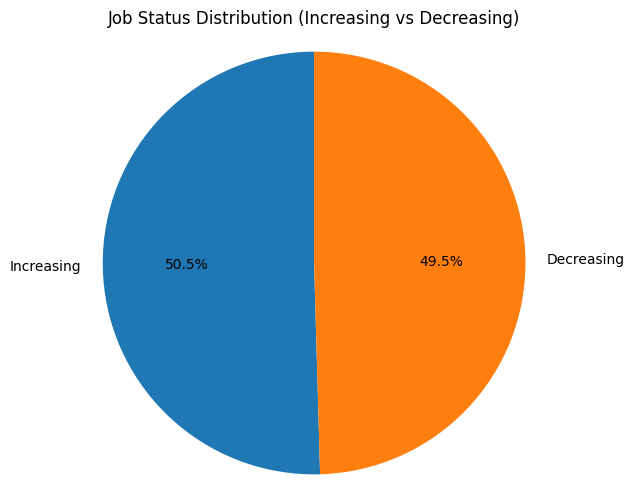

In [9]:
import matplotlib.pyplot as plt
status_counts = df['Job Status'].value_counts()
plt.figure(figsize=(6,6))
plt.pie(status_counts, labels=status_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Job Status Distribution (Increasing vs Decreasing)')
plt.axis('equal')
plt.show()


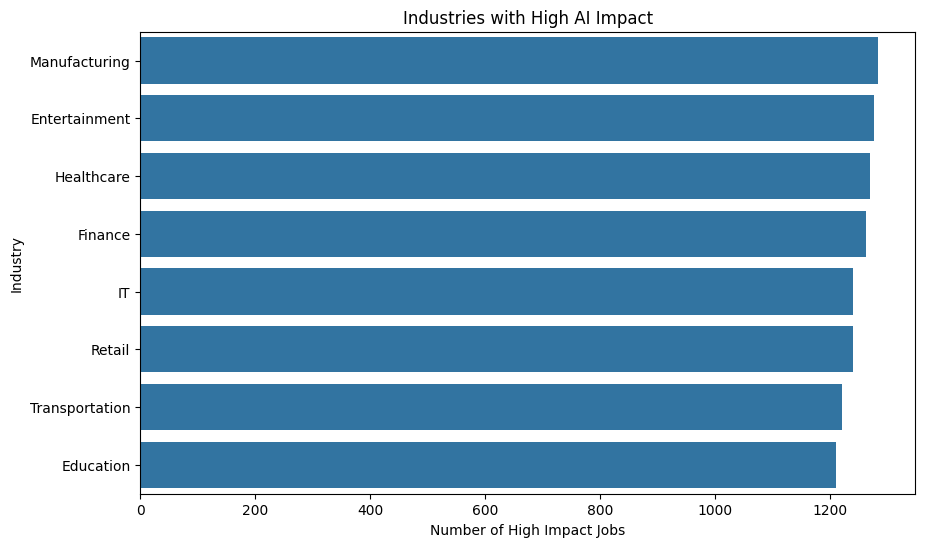

In [10]:
import seaborn as sns
import matplotlib.pyplot as plt
ai_impact_by_industry = df[df['AI Impact Level'] == 'High']['Industry'].value_counts()
plt.figure(figsize=(10,6))
sns.barplot(x=ai_impact_by_industry.values, y=ai_impact_by_industry.index)
plt.title('Industries with High AI Impact')
plt.xlabel('Number of High Impact Jobs')
plt.ylabel('Industry')
plt.show()


In [11]:
selected_columns = [
    'Median Salary (USD)',
    'Experience Required (Years)',
    'AI Impact Level',
    'Automation Risk (%)',
    'Required Education',
    'Remote Work Ratio (%)',
    'Job Status'
]
df_model = df[selected_columns]
df_model.head()


,Median Salary (USD),Experience Required (Years),AI Impact Level,Automation Risk (%),Required Education,Remote Work Ratio (%),Job Status
0,42109.76,5,Moderate,28.28,Master’s Degree,55.96,Increasing
1,132298.57,15,Moderate,89.71,Master’s Degree,16.81,Increasing
2,143279.19,4,Low,72.97,Bachelor’s Degree,91.82,Increasing
3,97576.13,15,High,99.94,Associate Degree,1.89,Increasing
4,60956.63,13,Low,37.65,Master’s Degree,53.76,Increasing


In [12]:
df_model['AI Impact Level'] = df_model['AI Impact Level'].map({
    'Low': 0,
    'Moderate': 1,
    'High': 2
})


/tmp/ipython-input-12-3122687816.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['AI Impact Level'] = df_model['AI Impact Level'].map({


In [13]:
df_model['Required Education'] = df_model['Required Education'].map({
    'High School': 0,
    'Associate Degree': 1,
    'Bachelor’s Degree': 2,
    'Master’s Degree': 3,
    'Doctoral Degree': 4
})


/tmp/ipython-input-13-1321647095.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Required Education'] = df_model['Required Education'].map({


In [14]:
df_model['Job Status'] = df_model['Job Status'].map({
    'Decreasing': 0,
    'Increasing': 1
})


/tmp/ipython-input-14-3200843298.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Job Status'] = df_model['Job Status'].map({


In [15]:
df_model.head()

,Median Salary (USD),Experience Required (Years),AI Impact Level,Automation Risk (%),Required Education,Remote Work Ratio (%),Job Status
0,42109.76,5,1,28.28,3.0,55.96,1
1,132298.57,15,1,89.71,3.0,16.81,1
2,143279.19,4,0,72.97,2.0,91.82,1
3,97576.13,15,2,99.94,1.0,1.89,1
4,60956.63,13,0,37.65,3.0,53.76,1


In [16]:
from sklearn.model_selection import train_test_split
X = df_model.drop('Job Status', axis=1)
y = df_model['Job Status']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [17]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
model = DecisionTreeClassifier(random_state=42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy:", accuracy)


Accuracy: 0.4955


In [18]:
# The previous Decision Tree model had low accuracy (~49%),
# so we're now trying a more powerful model (Random Forest)
# to improve prediction performance.


In [19]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train, y_train)
rf_pred = rf_model.predict(X_test)
rf_accuracy = accuracy_score(y_test, rf_pred)
print("Random Forest Accuracy:", rf_accuracy)


Random Forest Accuracy: 0.5003333333333333


In [20]:
# Tried ML models to predict Job Status (Decision Tree, Random Forest)
# But results were not accurate enough (accuracy < 51%)
# So we decided to build a smarter rule-based AI scoring system.


In [26]:
df_model['AI Threat Score'] = df_model['AI Impact Level'] * df_model['Automation Risk (%)'] / 100


df_model[['AI Impact Level', 'Automation Risk (%)', 'AI Threat Score']].head()


/tmp/ipython-input-26-3012748504.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['AI Threat Score'] = df_model['AI Impact Level'] * df_model['Automation Risk (%)'] / 100


,AI Impact Level,Automation Risk (%),AI Threat Score
0,1,28.28,0.2828
1,1,89.71,0.8971
2,0,72.97,0.0000
3,2,99.94,1.9988
4,0,37.65,0.0000


In [22]:

def classify_threat(score):
    if score >= 1.5:
        return 'High Risk'
    elif score >= 0.8:
        return 'Medium Risk'
    else:
        return 'Low Risk'


df_model['Risk Level'] = df_model['AI Threat Score'].apply(classify_threat)


df_model[['AI Threat Score', 'Risk Level']].head()


/tmp/ipython-input-22-1154071355.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_model['Risk Level'] = df_model['AI Threat Score'].apply(classify_threat)


,AI Threat Score,Risk Level
0,0.2828,Low Risk
1,0.8971,Medium Risk
2,0.0000,Low Risk
3,1.9988,High Risk
4,0.0000,Low Risk


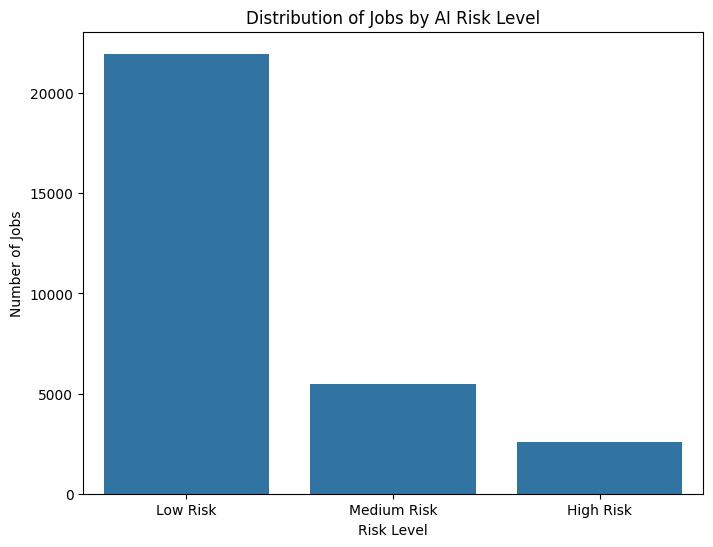

In [23]:
import seaborn as sns
import matplotlib.pyplot as plt


risk_counts = df_model['Risk Level'].value_counts()


plt.figure(figsize=(8,6))
sns.barplot(x=risk_counts.index, y=risk_counts.values)
plt.title('Distribution of Jobs by AI Risk Level')
plt.xlabel('Risk Level')
plt.ylabel('Number of Jobs')
plt.show()


In [24]:
def evaluate_job_risk(salary, experience, ai_impact, automation_risk, education, remote_ratio):
    # تحويل النصوص إلى أرقام نفس اللي سوينا في الداتا
    impact_map = {'Low': 0, 'Moderate': 1, 'High': 2}
    edu_map = {
        'High School': 0,
        'Associate Degree': 1,
        'Bachelor’s Degree': 2,
        'Master’s Degree': 3,
        'Doctoral Degree': 4
    }


    ai_impact_val = impact_map.get(ai_impact, 0)
    education_val = edu_map.get(education, 2)
    threat_score = ai_impact_val * (automation_risk / 100)


    if threat_score >= 1.5:
        risk = 'High Risk 🔴'
    elif threat_score >= 0.8:
        risk = 'Medium Risk 🟡'
    else:
        risk = 'Low Risk 🟢'

    print("AI Threat Score:", round(threat_score, 2))
    print("Risk Level:", risk)


In [25]:
evaluate_job_risk(
    salary=60000,
    experience=5,
    ai_impact='High',
    automation_risk=85,
    education='Bachelor’s Degree',
    remote_ratio=20
)


AI Threat Score: 1.7
Risk Level: High Risk 🔴


In [ ]:
salary = float(input("Enter the salary: "))
experience = int(input("Enter years of experience: "))
ai_impact = input("Enter AI Impact Level (Low / Moderate / High): ")
automation_risk = float(input("Enter Automation Risk (%): "))
education = input("Enter Education Level (e.g., Bachelor's Degree): ")
remote_ratio = float(input("Enter Remote Work Ratio (%): "))

evaluate_job_risk(salary, experience, ai_impact, automation_risk, education, remote_ratio)
